## Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

#### Задание №1
Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression

%matplotlib inline

In [36]:
X, y, coef = make_regression(
    n_samples=1000, 
    n_features = 1, 
    n_informative = 1, 
    n_targets = 1, 
    noise = 10, 
    coef = True, 
    random_state = 1)

In [37]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [38]:
def gd_model(X, y, iterations, alpha):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errs=[]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        errs.append(calc_mse(y, y_pred))
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {errs[i-1]}')
    return W,errs

In [40]:
W_gd, err_gd = gd_model(X.T, y,iterations=10000, alpha=1e-4)

Iter: 1000, weights: [5.7374322], error 1134.8593048363778
Iter: 2000, weights: [11.48052882], error 803.9110184886379
Iter: 3000, weights: [16.21658547], error 578.8492808850582
Iter: 4000, weights: [20.12218449], error 425.7958044880854
Iter: 5000, weights: [23.3429449], error 321.7116234690102
Iter: 6000, weights: [25.99895171], error 250.92906436977768
Iter: 7000, weights: [28.18923329], error 202.7933090265322
Iter: 8000, weights: [29.99545357], error 170.05853690256146
Iter: 9000, weights: [31.48495691], error 147.79721995911382
Iter: 10000, weights: [32.71327896], error 132.65838746075806


In [41]:
def sgd_model(X, y, iterations, qty_in_batch, alpha):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    errs = []
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        errs.append(calc_mse(y_tmp, y_pred_tmp))
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {errs[i-1]}')
    return W,errs

In [42]:
W_sgd, err_sgd = sgd_model(X.T, y, iterations=10000, qty_in_batch=32, alpha=1e-4)

Iter: 1000, weights: [6.81928596], error 716.7130279137655
Iter: 2000, weights: [12.37221397], error 455.508151108358
Iter: 3000, weights: [16.95152987], error 289.4905055119158
Iter: 4000, weights: [20.7279401], error 186.1697485367148
Iter: 5000, weights: [23.84222059], error 123.80725578948368
Iter: 6000, weights: [26.41046462], error 87.9137431624914
Iter: 7000, weights: [28.52841045], error 68.87836828240977
Iter: 8000, weights: [30.27501027], error 60.36539768491835
Iter: 9000, weights: [31.71537331], error 58.23128860432946
Iter: 10000, weights: [32.90319303], error 59.79438239852997


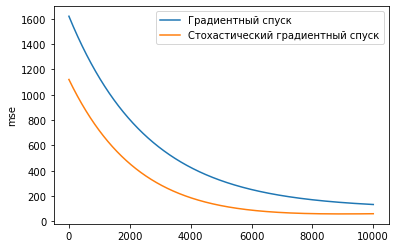

In [43]:
x = np.arange(10000)
plt.plot(x, err_gd, label="Градиентный спуск")
plt.plot(x, err_sgd, label="Стохастический градиентный спуск")
plt.ylabel("mse")
#plt.xlim(0, 5000)
plt.legend()
plt.show()

Вывод: скорость сходимости стохастического градиентного спуска значительно выше.

#### Задание №2
Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.

In [44]:
def gd_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    err = np.zeros(iterations)
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err[i-1] = calc_mse(y, y_pred) + lambda_ * np.dot(W.T, W)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W**2) 
    if i % (iterations / 10) == 0:
        print(f'Iter: {i}, weights: {W}, error {err[i-1]}')
    return W, err

In [45]:
W_gl, err_gl = gd_model_l2(X.T, y,iterations=10000, alpha=1e-4, lambda_=1e-8)

Iter: 10000, weights: [32.96396227], error 129.92628094186946


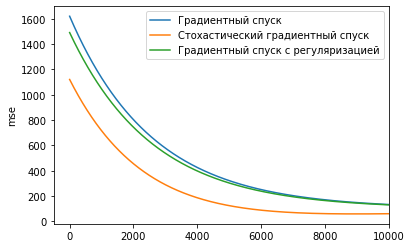

In [46]:
x = np.arange(10000)
plt.plot(x, err_gd, label="Градиентный спуск")
plt.plot(x, err_sgd, label="Стохастический градиентный спуск")
plt.plot(x, err_gl, label="Градиентный спуск с регуляризацией")
plt.ylabel("mse")
plt.legend()
plt.xlim(-500, 10000)
plt.show()